# Exploratory data analysis: Bike Sharing Dataset

In [1]:
# Load packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import altair as alt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## 1. Description of the dataset

 The dataset we chose is the Bike Sharing Dataset from [UCI machine learning repository]("https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset"). This dataset contains the hourly and daily count of rental bikes in 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information. It is provided by Hadi Fanaee-T, Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto.

# 2. Load the dataset

We downloaded and splitted the dataset into 80% train set and 20% test using the [download script]("https://github.com/UBC-MDS/DSCI_522_Group_409/blob/master/src/data_download.py") in our group repo.

In [2]:
# Load the dataset
bike_data_train = pd.read_csv("../data/train.csv")
bike_data_train_target = pd.read_csv("../data/train_target.csv")

# Combine the feature and target
bike_data = pd.concat([bike_data_train, bike_data_train_target], axis = 1)

# Preview
bike_data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0         1714  2011-03-17       1   0     3   1        0        4   
1        12835  2012-06-23       3   1     6  23        0        6   
2         8841  2012-01-09       1   1     1   4        0        1   
3        13930  2012-08-08       3   1     8  14        0        3   
4         9889  2012-02-22       1   1     2   1        0        3   
5         1037  2011-02-15       1   0     2  21        0        2   
6        11197  2012-04-16       2   1     4  17        1        1   
7         1735  2011-03-17       1   0     3  22        0        4   
8        17129  2012-12-21       1   1    12  11        0        5   
9         4483  2011-07-10       3   0     7  16        0        0   
10       12157  2012-05-26       2   1     5  17        0        6   
11        4113  2011-06-25       3   0     6   6        0        6   
12        1258  2011-02-25       1   0     2  13        0        5   
13       12886  2012-06-26       3   1     6   2        0        2   
14       13206  2012-07-09       3   1     7  10        0        1   
15       15768  2012-10-24       4   1    10   4        0        3   
16       13472  2012-07-20       3   1     7  12        0        5   
17       10301  2012-03-10       1   1     3   6        0        6   
18        9326  2012-01-29       1   1     1  11        0        0   
19        1020  2011-02-15       1   0     2   4        0        2   
20        1953  2011-03-27       2   0     3   3        0        0   
21        8079  2011-12-08       4   0    12   6        0        4   
22        8413  2011-12-22       1   0    12   4        0        4   
23         129  2011-01-06       1   0     1  14        0        4   
24        9382  2012-01-31       1   1     1  19        0        2   
25       15687  2012-10-20       4   1    10  19        0        6   
26       12167  2012-05-27       2   1     5   3        0        0   
27       10438  2012-03-16       1   1     3   0        0        5   
28        5666  2011-08-29       3   0     8  12        0        1   
29        1451  2011-03-05       1   0     3  17        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
13873    13071  2012-07-03       3   1     7  19        0        2   
13874    10558  2012-03-21       2   1     3   0        0        3   
13875    11696  2012-05-07       2   1     5  12        0        1   
13876    12220  2012-05-29       2   1     5   8        0        2   
13877    10844  2012-04-01       2   1     4  22        0        0   
13878    12901  2012-06-26       3   1     6  17        0        2   
13879     6902  2011-10-20       4   0    10   4        0        4   
13880     3214  2011-05-18       2   0     5  19        0        3   
13881     5788  2011-09-03       3   0     9  14        0        6   
13882     6231  2011-09-22       3   0     9   4        0        4   
13883    15454  2012-10-11       4   1    10   2        0        4   
13884     5770  2011-09-02       3   0     9  20        0        5   
13885     9724  2012-02-15       1   1     2   2        0        3   
13886    11153  2012-04-14       2   1     4  21        0        6   
13887     7739  2011-11-24       4   0    11   1        1        4   
13888    11493  2012-04-29       2   1     4   1        0        0   
13889    10993  2012-04-08       2   1     4   4        0        0   
13890    13298  2012-07-13       3   1     7   6        0        5   
13891    17187  2012-12-23       1   1    12  21        0        0   
13892     5647  2011-08-28       3   0     8  17        0        0   
13893     7907  2011-12-01       4   0    12   2        0        4   
13894    13891  2012-08-06       3   1     8  23        0        1   
13895    10083  2012-03-01       1   1     3   4        0        4   
13896    14261  2012-08-22       3   1     8   9        0        3   
13897    16735  2012-12-05       4   1    12   1        0        3   
13898    16305  2

# 3. Explore the dataset

### 3.1 Pandas Profile Report
We initially explored this dataset by using the pandas profile report. 

In [34]:
profile = ProfileReport(bike_data)
profile

**Findings from the pandas profile report:**
1. The target `cnt` (i.e. count of total rental bikes) is highly correlated with `registered` (i.e. count of registered users). Since our research question does not care about whether the user is registered or casual users. We decided to remove `registered` and `casual` columns.
2. The report is showing that `temp` and `atemp` are highly correlated with each other. They both are normalized temperatures in Celsius while `atemp` is the feeling temperature and `temp` is the real temperature. We decided to create a new column called `temp_actual` (i.e. the non-normalized actual temperature) and remove `temp` and `atemp` columns.
3. `dtday` is a DateTime column, which has a high cardinality. We decided to remove it because there are other time-related columns, such as `mnth` and `hr`, we can use to answer our research question.

### 3.2 Further explore

After using pandas profile report, we also further explored some useful features in our dataset as below.

In [57]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 17 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 1.8+ MB


In [56]:
bike_data.describe()

instant        season            yr          mnth            hr  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean    8701.550960      2.506581      0.502697      6.550601     11.565993   
std     5009.241014      1.105796      0.500011      3.425914      6.895803   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     4369.500000      2.000000      0.000000      4.000000      6.000000   
50%     8691.000000      3.000000      1.000000      7.000000     12.000000   
75%    13047.500000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.028195      2.997051      0.680788      1.426527      0.498538   
std        0.165537      2.010383      0.466188      0.639350      0.192675   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      0.980000   

              atemp           hum     windspeed        casual    registered  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.477102      0.626504      0.190027     36.290872    154.357621   
std        0.172016      0.193304      0.122040     50.081632    151.104995   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.470000      0.104500      4.000000     35.000000   
50%        0.484800      0.620000      0.194000     17.000000    116.000000   
75%        0.621200      0.780000      0.253700     49.000000    221.000000   
max        1.000000      1.000000      0.850700    362.000000    886.000000   

                cnt  
count  13903.000000  
mean     190.648493  
std      181.565047  
min        1.000000  
25%       40.000000  
50%      143.000000  
75%      283.000000  
max      977.000000

In [55]:
print("The dataframe columns are: ", list(bike_data.columns), "\n")

month_list = sorted(list(bike_data['mnth'].unique()))
print("- The month ranges from {0} to {1} and there are {2} months: ".format(month_list[0],
                                                                           month_list[-1],
                                                                           len(month_list)),"\n")

hour_list = sorted(list(bike_data['hr'].unique()))
print("- The hour ranges from {0} to {1} and there are {2} hours: ".format(hour_list[0],
                                                                           hour_list[-1],
                                                                           len(hour_list)),"\n")

print("- The holiday type contains: ", list(bike_data['holiday'].unique()),"\n")

print("- The weekday type contains: ", list(bike_data['weekday'].unique()),"\n")

print("- The workingday type contains: ", list(bike_data['workingday'].unique()),"\n")

print("- The weather type contains: ", list(bike_data['weathersit'].unique()),"\n")

temp_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized tempereature ranges from {0} to {1}".format(temp_list[0],
                                                                    temp_list[-1]), "\n")

hum_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized humidity ranges from {0} to {1}".format(hum_list[0],
                                                                hum_list[-1]), "\n")


wind_list = sorted(list(bike_data['windspeed'].unique()))
print("- The normalized windspeed ranges from {0} to {1}".format(wind_list[0],
                                                                wind_list[-1]), "\n")

cnt_list = sorted(list(bike_data['cnt'].unique()))
print("- The target count of bike rentals ranges from {0} to {1}".format(cnt_list[0],
                                                                cnt_list[-1]), "\n")

The dataframe columns are:  ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'] 

- The month ranges from 1 to 12 and there are 12 months:  

- The hour ranges from 0 to 23 and there are 24 hours:  

- The holiday type contains:  [0, 1] 

- The weekday type contains:  [4, 6, 1, 3, 2, 5, 0] 

- The workingday type contains:  [1, 0] 

- The weather type contains:  [1, 2, 3, 4] 

- The normalized tempereature ranges from 0.02 to 0.98 

- The normalized humidity ranges from 0.02 to 0.98 

- The normalized windspeed ranges from 0.0 to 0.8507 

- The target count of bike rentals ranges from 1 to 977 



**Findings from further exploring**:
1. We found that most of the features are already normalized, which would be great when building the machine learning model. 
2. During EDA, 3 columns (i.e. `temp`, `hum`, `windspeed`) required to be transformed back to the non-normalized numbers so that we can better interpret the relationship between these features and the target.
3. There are 4 categorical columns (i.e. `holiday, weekday`, `workingday`, `weatherday`) which is already coded as numbers in the dataset. We will use the following descriptions from the source website to interpret these columns in our analysis.

    - holiday : Yes is 1, No is 0
    - weekday : Day of the week, starting from Sunday being 0
    - workingday : Yes is 1, No is 0
    - weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

### 3.3 Checking the Null Values in the dataset

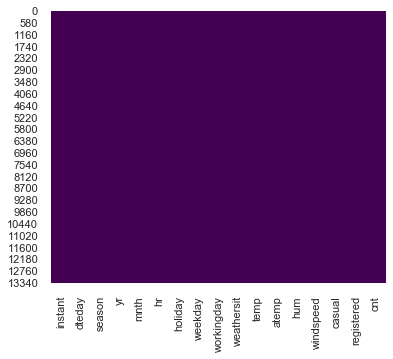

In [61]:
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(bike_data.isnull(), cmap='viridis', cbar=False)

**Findings**: As we can see from the plot above, there is no null values in the dataset.

## 4. Initial Thoughts

> .....  TO DO 


## 5. Wrangling

In [3]:
# Drop the unnecssary columns discussed in Section 3
bike_data = bike_data.drop(['instant', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

# Create a new non-normalized actual temperature column and remove the `temp` column
bike_data['temp_actual'] = bike_data['temp'].apply(lambda x: x*47 - 8)
bike_data = bike_data.drop(['temp'], axis = 1)

# Transform the weekday column back to categorical
bike_data['weekday'] = bike_data['weekday'].replace(
                                {0: 'Sunday',
                                 1: 'Monday',
                                 2: 'Tuesday',
                                 3: 'Wednesday',
                                 4: 'Thursday',
                                 5: 'Friday',
                                 6: 'Saturday'})

bike_data

season  mnth  hr  holiday    weekday  workingday  weathersit   hum  \
0           1     3   1        0   Thursday           1           1  0.71   
1           3     6  23        0   Saturday           0           1  0.44   
2           1     1   4        0     Monday           1           1  0.64   
3           3     8  14        0  Wednesday           1           2  0.52   
4           1     2   1        0  Wednesday           1           1  0.70   
5           1     2  21        0    Tuesday           1           1  0.52   
6           2     4  17        1     Monday           0           1  0.33   
7           1     3  22        0   Thursday           1           1  0.66   
8           1    12  11        0     Friday           1           2  0.42   
9           3     7  16        0     Sunday           0           1  0.41   
10          2     5  17        0   Saturday           0           2  0.52   
11          3     6   6        0   Saturday           0           1  0.57   
12          1     2  13        0     Friday           1           3  0.60   
13          3     6   2        0    Tuesday           1           1  0.43   
14          3     7  10        0     Monday           1           2  0.83   
15          4    10   4        0  Wednesday           1           1  0.77   
16          3     7  12        0     Friday           1           3  0.83   
17          1     3   6        0   Saturday           0           1  0.44   
18          1     1  11        0     Sunday           0           1  0.28   
19          1     2   4        0    Tuesday           1           1  0.37   
20          2     3   3        0     Sunday           0           3  0.69   
21          4    12   6        0   Thursday           1           1  0.55   
22          1    12   4        0   Thursday           1           1  0.82   
23          1     1  14        0   Thursday           1           1  0.36   
24          1     1  19        0    Tuesday           1           1  0.29   
25          4    10  19        0   Saturday           0           1  0.45   
26          2     5   3        0     Sunday           0           1  0.73   
27          1     3   0        0     Friday           1           1  0.77   
28          3     8  12        0     Monday           1           2  0.44   
29          1     3  17        0   Saturday           0           2  0.59   
...       ...   ...  ..      ...        ...         ...         ...   ...   
13873       3     7  19        0    Tuesday           1           2  0.36   
13874       2     3   0        0  Wednesday           1           1  0.88   
13875       2     5  12        0     Monday           1           2  0.68   
13876       2     5   8        0    Tuesday           1           1  0.74   
13877       2     4  22        0     Sunday           0           3  0.63   
13878       3     6  17        0    Tuesday           1           1  0.28   
13879       4    10   4        0   Thursday           1           1  0.82   
13880       2     5  19        0  Wednesday           1           3  0.88   
13881       3     9  14        0   Saturday           0           2  0.66   
13882       3     9   4        0   Thursday           1           2  0.94   
13883       4    10   2        0   Thursday           1           1  0.50   
13884       3     9  20        0     Friday           1           1  0.73   
13885       1     2   2        0  Wednesday           1           1  0.61   
13886       2     4  21        0   Saturday           0           2  0.43   
13887       4    11   1        1   Thursday           0           1  0.57   
13888       2     4   1        0     Sunday           0           2  0.81   
13889       2     4   4        0     Sunday           0           1  0.40   
13890       3     7   6        0     Friday           1           2  0.54   
13891       1    12  21        0     Sunday           0           1  0.70   
13892       3     8  17        0     Sunday           0           1  0.40   
138

In [18]:
# group by weekday and hour to calculate the average cnt for heatmap
bike_data_2 = bike_data.groupby(['weekday', 'hr']).mean().reset_index()
bike_data_2

weekday  hr      instant    season        yr      mnth  holiday  \
0          0   0  8749.049383  2.481481  0.530864  6.296296      0.0   
1          0   1  8486.761364  2.511364  0.477273  6.579545      0.0   
2          0   2  8582.064935  2.428571  0.506494  6.376623      0.0   
3          0   3  8733.545455  2.431818  0.522727  6.375000      0.0   
4          0   4  8774.573171  2.585366  0.512195  6.560976      0.0   
..       ...  ..          ...       ...       ...       ...      ...   
163        6  19  8762.842697  2.449438  0.516854  6.471910      0.0   
164        6  20  9004.659091  2.579545  0.511364  6.863636      0.0   
165        6  21  8340.488095  2.476190  0.452381  6.630952      0.0   
166        6  22  8669.250000  2.437500  0.487500  6.675000      0.0   
167        6  23  8732.771084  2.469880  0.506024  6.518072      0.0   

     workingday  weathersit      temp     atemp       hum  windspeed  \
0           0.0    1.320988  0.450617  0.435094  0.673457   0.176162   
1           0.0    1.375000  0.444318  0.428899  0.703864   0.164691   
2           0.0    1.337662  0.428052  0.417556  0.689870   0.172330   
3           0.0    1.431818  0.435455  0.427172  0.712386   0.142474   
4           0.0    1.439024  0.425122  0.414266  0.722317   0.154721   
..          ...         ...       ...       ...       ...        ...   
163         0.0    1.438202  0.497978  0.472587  0.575506   0.202416   
164         0.0    1.465909  0.500455  0.480025  0.603636   0.193013   
165         0.0    1.476190  0.481190  0.462121  0.650357   0.182127   
166         0.0    1.337500  0.474500  0.460230  0.638250   0.172017   
167         0.0    1.409639  0.457831  0.442684  0.660120   0.170659   

        casual  registered         cnt  
0    18.246914   76.518519   94.765432  
1    15.431818   61.568182   77.000000  
2    11.636364   47.324675   58.961039  
3     8.363636   22.318182   30.681818  
4     2.280488    6.756098    9.036585  
..         ...         ...         ...  
163  70.022472  166.438202  236.460674  
164  51.659091  132.045455  183.704545  
165  38.797619  112.226190  151.023810  
166  35.612500  107.400000  143.012500  
167  26.012048   90.108434  116.120482  

[168 rows x 16 columns]

## 6. Research Questions

Our main predictive research question is:
> Given the information shared by Bike share company, can we predict the count of bike rentals in order to forecast the future demand?

Another sub questions is:
> Identify the stronges predictors that can help in predicting the future demand for the bike rentals.

## 7. Data Analysis & Visualizations

### 7.1 Analysis of temp on bike rental count 

!! TO DO: description of the plot and how it can help to answer the research question.

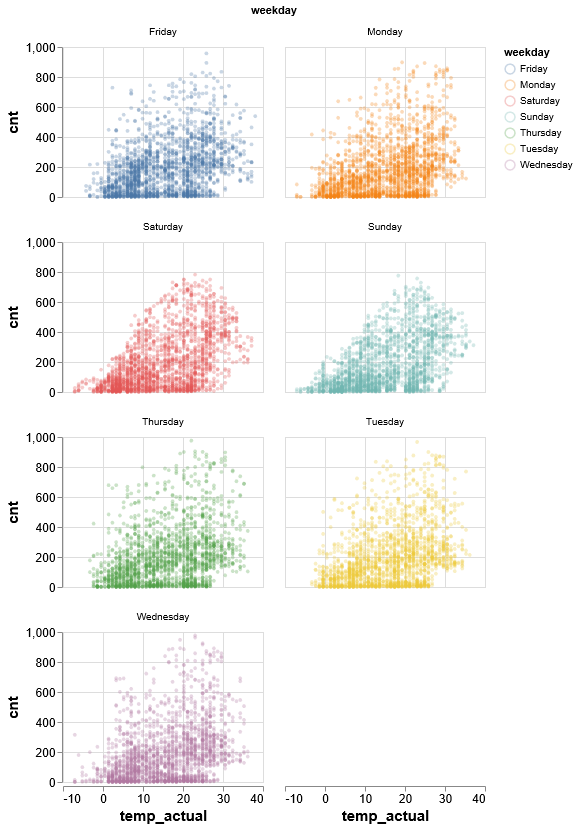

In [4]:
chart = alt.Chart(bike_data).mark_point(opacity=0.3, size = 4).encode(
            alt.X('temp_actual:Q'),
            alt.Y('cnt:Q'),
            color = 'weekday:N'
        ).properties(title="Temp vs Bike Rental",
                    width=200, height=150
        ).facet(facet='weekday:N',
                columns=2
        ).configure_axisX(labelFontSize=12,
                        titleFontSize=15
        ).configure_axisY(labelFontSize=12,
                        titleFontSize=15
        ).configure_title(fontSize=17)
chart

**Observations**: TO DO

### 7.2 Analysis of hour and weekday on bike rental count 

!! TO DO: description of the plot and how it can help to answer the research question.

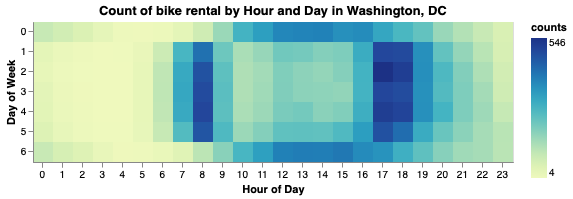

In [17]:
heat_map = alt.Chart(bike_data_2).mark_rect().encode(
                x = alt.X("hr:O", 
                          title = "Hour of Day", 
                          axis = alt.Axis(labelAngle = 0)),
                y = alt.Y('weekday:O',
                          sort=["Monday", "Tuesday", "Wednesday", 
                                "Thursday", "Friday", "Saturday", "Sunday"],
                          title = "Day of Week"),
                color=alt.Color('cnt:Q', 
                                legend=alt.Legend(title = "counts"))
            ).properties(title = "Count of bike rental by Hour and Day in Washington, DC")
heat_map

**Observations**: TO DO

For Victor: Please add in the correlation matrix and any other plots you want to put in this section.